# Analyzing borrowers’ risk of defaulting
Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A **credit scoring** is used to evaluate the ability of a potential borrower to repay their loan.

## Step 1. 
- Open the data file /datasets/credit_scoring_eng.csv and have a look at the general information.

In [2]:
import pandas as pd
import numpy as np

try:
    customers_df = pd.read_csv('credit_scoring_eng.csv')
except:
    customers_df = pd.read_csv('/datasets/credit_scoring_eng.csv') 

In [3]:
customers_df.info()
customers_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [4]:
customers_df.tail(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,secondary education,1,married,0,F,employee,1,17517.812,to become educated
21516,0,-914.391429,42,bachelor's degree,0,married,0,F,business,0,51649.244,purchase of my own house
21517,0,-404.679034,42,bachelor's degree,0,civil partnership,1,F,business,0,28489.529,buying my own car
21518,0,373995.710838,59,SECONDARY EDUCATION,1,married,0,F,retiree,0,24618.344,purchase of a car
21519,1,-2351.431934,37,graduate degree,4,divorced,3,M,employee,0,18551.846,buy commercial real estate
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car
21524,2,-1984.507589,40,secondary education,1,married,0,F,employee,0,13127.587,to buy a car


## Column Definitions
 - *children* : The number of children a potential customer has
 - *days_employed* : How many days the potential customer has been employed
 - *dob_years* : The customer's age written in years
 - *education* : The customer's education level
 - *education_id* : Identifier for the educational level of customer
 - *family_status* : The customer's marital status
 - *family_status_id* : Identifier for the customer's marital status
 - *gender* : The customer's gender
 - *income_type* : The customer's income type
 - *debt* : Code for whether a customer has defaulted on a loan
 - *total_income* : monthly income
 - *purpose* : Reason for wanting to take a loan out

In [5]:
print(" \nShow the Boolean Dataframe : \n\n", customers_df.isnull())

 
Show the Boolean Dataframe : 

        children  days_employed  dob_years  education  education_id  \
0         False          False      False      False         False   
1         False          False      False      False         False   
2         False          False      False      False         False   
3         False          False      False      False         False   
4         False          False      False      False         False   
...         ...            ...        ...        ...           ...   
21520     False          False      False      False         False   
21521     False          False      False      False         False   
21522     False          False      False      False         False   
21523     False          False      False      False         False   
21524     False          False      False      False         False   

       family_status  family_status_id  gender  income_type   debt  \
0              False             False   False        F

In [6]:
print(" \nCount total NaN at each column in Customer's Dataframe : \n\n",
      customers_df.isnull().sum())

 
Count total NaN at each column in Customer's Dataframe : 

 children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


In [7]:
print((2174/21525)*100)

10.099883855981417


In [8]:
customers_df.isnull().sum()/ customers_df.shape[0] * 100

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

In [9]:
customers_df.describe(include = 'all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,19351.000000,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,26787.568355,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


In [10]:
(abs(customers_df['days_employed'])/365).describe()

count    19351.000000
mean       183.328024
std        380.906522
min          0.066141
25%          2.539751
50%          6.011563
75%         15.172281
max       1100.699727
Name: days_employed, dtype: float64

In [11]:
customers_df[customers_df['days_employed'] <0]['days_employed'].count()

15906

### Problems Noted in days_employed column
The mean number of years worked is 183. It is impossible for a human being to live this long. I believe there is something wrong with this column in the dataframe. There are also negative values displayed in this column, which is why I used the abs() command. This gave me more of a clear idea of how many years the dataframe meant to project when representing the customer's days_employed. It appears that out of 21525 rows 15906 rows are negative in the days_employed column.

In [12]:
customers_df.duplicated().sum()

54

In [13]:
duplicated_rows = customers_df[customers_df.duplicated()]
duplicated_rows.info()
100*len(duplicated_rows)/len(customers_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 2849 to 21415
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          54 non-null     int64  
 1   days_employed     0 non-null      float64
 2   dob_years         54 non-null     int64  
 3   education         54 non-null     object 
 4   education_id      54 non-null     int64  
 5   family_status     54 non-null     object 
 6   family_status_id  54 non-null     int64  
 7   gender            54 non-null     object 
 8   income_type       54 non-null     object 
 9   debt              54 non-null     int64  
 10  total_income      0 non-null      float64
 11  purpose           54 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 5.5+ KB


0.2508710801393728

### 1.1 Conclusions
 - There are 21525 rows and 12 columns of data in the customers_df 
 - In the *education* column, consistant capitalization and lowercasing is not present
 - Around 10% of data in the *days_employed* and *total_income* is missing
 - There are multiple issues with the *days_employed* column, as noted above. It either needs to be fixed or the column should be dropped entirely
 - Column *purpose* needs to be lemmatized and categorized
 - Around 25% of *customers_df* is made up of duplicate rows (54 rows)
 - *education_id* and *family_status_id* columns are unneccessary information and can probably be dropped from the *customers_df* dataframe as they mean the same as the *education* and *family_status* columns
 - According to the *children* column, the minimum number of children is -1. This is impossible
 - According to the *dob_years* column, the minimum number of a customer applying for a loan is 0 years. This is also impossible as someone that young can not apply for a loan.
 - I need to specify the data type of *days_employed* and *total_income*
 
#### Column Data Types
- *Children* : Numeric
- *days_employed* : Numeric
- *dob_years* : Numeric
- *education* : Categorical
- *education_id* : Numeric
- *family_status* : Categorical
- *family_status_id* : Numeric
- *gender* : Categorical
- *income_type* : Categorical
- *debt* : Boolean
- *total_income* : Numeric
- *purpose* : Categorical

## 2.  Data preprocessing
- Identify and fill in missing values
- Replace the real number data type with the integer type
- Delete duplicate data
- Categorize the data
### Be sure to explain:
- Which missing values you identified
- Possible reasons these missing values were present
- Which method you used to fill in missing values
- Which method you used to find and delete duplicate data and why
- Possible reasons why duplicate data was present
- Which method you used to change the data type and why
- Which dictionaries you've selected for this dataset and why
- The data may contain artifacts, or values that don't correspond to reality (for instance, a negative number of days employed). This kind of thing happens when you're working with real data. You need to describe the possible reasons such data may have turned up and process it.


### 2.1 Processing missing values

In [14]:
Count_missing = customers_df.isnull().sum().sort_values()
percent = (customers_df.isnull().sum()/customers_df.isnull().count()).sort_values()
print(Count_missing['days_employed'])
print(Count_missing['total_income'])
print(percent['days_employed'] * 100)
print(percent['total_income'] * 100)

2174
2174
10.099883855981417
10.099883855981417


Note: 10% of data is missing in the *days_employed* and *total_income* columns. Lets see if the missing data columns are related to one another.

In [15]:
print(customers_df[customers_df['total_income'].isnull()].count())

children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64


In [16]:
NA_df = customers_df[customers_df['total_income'].isna()]
NA_df.groupby('education_id')['education_id'].count()

education_id
0     544
1    1540
2      69
3      21
Name: education_id, dtype: int64

In [17]:
NA_df_2 = customers_df[customers_df['days_employed'].isna()]
NA_df_2.groupby('education_id')['education_id'].count()

education_id
0     544
1    1540
2      69
3      21
Name: education_id, dtype: int64

In [18]:
NA_df_3 = customers_df[customers_df['total_income'].isna()]
NA_df_3.groupby('family_status_id')['family_status_id'].count()

family_status_id
0    1237
1     442
2      95
3     112
4     288
Name: family_status_id, dtype: int64

In [19]:
NA_df_4 = customers_df[customers_df['days_employed'].isna()]
NA_df_4.groupby('family_status_id')['family_status_id'].count()

family_status_id
0    1237
1     442
2      95
3     112
4     288
Name: family_status_id, dtype: int64

In [20]:
customers_df[customers_df['days_employed'].isnull()].head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
65,0,NaN,21,secondary education,1,unmarried,4,M,business,0,NaN,transactions with commercial real estate
67,0,NaN,52,bachelor's degree,0,married,0,F,retiree,0,NaN,purchase of the house for my family
72,1,NaN,32,bachelor's degree,0,married,0,M,civil servant,0,NaN,transactions with commercial real estate
82,2,NaN,50,bachelor's degree,0,married,0,F,employee,0,NaN,housing
83,0,NaN,52,secondary education,1,married,0,M,employee,0,NaN,housing


In [21]:
customers_df[customers_df['total_income'].isnull()].head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
65,0,NaN,21,secondary education,1,unmarried,4,M,business,0,NaN,transactions with commercial real estate
67,0,NaN,52,bachelor's degree,0,married,0,F,retiree,0,NaN,purchase of the house for my family
72,1,NaN,32,bachelor's degree,0,married,0,M,civil servant,0,NaN,transactions with commercial real estate
82,2,NaN,50,bachelor's degree,0,married,0,F,employee,0,NaN,housing
83,0,NaN,52,secondary education,1,married,0,M,employee,0,NaN,housing


Note: It appears the 10% missing data in *days_employed* are related to the missing data in *total_income*. Both are quantitative variables, which means they should be filled with the average of their column. Probably an excel error. However for the *total_income* column one needs to take into account the *income_type* before assigning the associated average value.

In [22]:
mean_income_per_type = customers_df.groupby('income_type').agg({'total_income': 'mean'}).reset_index()
mean_income_per_type

,income_type,total_income
0,business,32386.793835
1,civil servant,27343.729582
2,employee,25820.841683
3,entrepreneur,79866.103000
4,paternity / maternity leave,8612.661000
5,retiree,21940.394503
6,student,15712.260000
7,unemployed,21014.360500


In [23]:
Total_income_replace = {row["income_type"]:row["total_income"] for i, row in mean_income_per_type.iterrows()}
customers_df['total_income'] = customers_df['total_income'].fillna(customers_df["income_type"].map(Total_income_replace))
customers_df[customers_df['days_employed'].isnull()].head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,21940.394503,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,27343.729582,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,21940.394503,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,27343.729582,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,21940.394503,to have a wedding
65,0,NaN,21,secondary education,1,unmarried,4,M,business,0,32386.793835,transactions with commercial real estate
67,0,NaN,52,bachelor's degree,0,married,0,F,retiree,0,21940.394503,purchase of the house for my family
72,1,NaN,32,bachelor's degree,0,married,0,M,civil servant,0,27343.729582,transactions with commercial real estate
82,2,NaN,50,bachelor's degree,0,married,0,F,employee,0,25820.841683,housing
83,0,NaN,52,secondary education,1,married,0,M,employee,0,25820.841683,housing


In [24]:
customers_df[customers_df['days_employed'].isnull()].tail(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21308,0,NaN,48,secondary education,1,married,0,F,business,0,32386.793835,buying property for renting out
21311,0,NaN,49,secondary education,1,married,0,F,retiree,0,21940.394503,buying property for renting out
21321,0,NaN,56,Secondary Education,1,married,0,F,retiree,0,21940.394503,real estate transactions
21350,0,NaN,21,secondary education,1,unmarried,4,M,business,0,32386.793835,to buy a car
21364,0,NaN,50,secondary education,1,married,0,M,employee,0,25820.841683,transactions with my real estate
21369,2,NaN,42,secondary education,1,divorced,3,M,business,0,32386.793835,buy residential real estate
21390,20,NaN,53,secondary education,1,married,0,M,business,0,32386.793835,buy residential real estate
21391,0,NaN,52,secondary education,1,married,0,F,business,0,32386.793835,purchase of the house for my family
21407,1,NaN,36,secondary education,1,married,0,F,business,0,32386.793835,building a real estate
21414,0,NaN,65,secondary education,1,married,0,F,retiree,0,21940.394503,purchase of my own house


Note: At this point, the *total_income* column missing values have been filled with the average income per *income_type*. To achieve this, I used the pandas.DataFrame.iterrows which allowed me to write over the null values in the *total_income* column with the average income per *income_type*. Then I mapped these values to the data frame using the pandas.DataFrame.fillna() and pandas.DataFrame.map().

Now I need to fill in the missing values for *days_employed*. 

In [25]:
days_employed_mean = customers_df['days_employed'].mean()
customers_df['days_employed'] = customers_df['days_employed'].fillna(value = days_employed_mean)
customers_df['days_employed']= abs(customers_df['days_employed'])
print(customers_df['days_employed'].isnull().sum())

0


Note: I have removed the missing values in the *days_employed* column by filling them in with the average days employed in the entire column. I have also replaced the negative *days_employed* with the absolute value of the days employed using abs().

In [26]:
customers_df.describe(include = 'all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,21525.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,21525.000000,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,66524.042044,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,26783.346520,NaN
std,1.381587,131827.872709,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,15665.112650,NaN
min,-1.000000,24.141633,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,1025.608174,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,17247.708000,NaN
50%,0.000000,2609.841015,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,24309.013000,NaN
75%,1.000000,63046.497661,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32386.793835,NaN


Note: It is not possible to have -1 children and it is highly unlikely that someone would have 20 children. These values are shows in the min and max values of the *children* column. I believe these values were mistyped when the data was being gathered. Since number of children are apart of our question I need to fix these values with .replace(). 

In [27]:
customers_df['children'] = customers_df['children'].replace(-1, 1)
customers_df['children'] = customers_df['children'].replace(20, 2)
customers_df.describe(include = 'all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,21525.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,21525.000000,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.479721,66524.042044,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,26783.346520,NaN
std,0.755528,131827.872709,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,15665.112650,NaN
min,0.000000,24.141633,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,1025.608174,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,17247.708000,NaN
50%,0.000000,2609.841015,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,24309.013000,NaN
75%,1.000000,63046.497661,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32386.793835,NaN


### 2.2 Conclusion
- It was important to fill in the missing values of the *days_employed* and *total_income* columns because 10% of the entirety of the data was missing. That is a big chunk of data!
- Since both *days_employed* and *total_income* are quantitative columns, average values were sufficient enough to replace the missing data
- -1 children and 20 children were replaced with more realistic numbers since one can not have -1 children and it is extremely unlikely that an individual will have 20 children. I believe these values were mistyped.

### 2.3 Data type replacement

In [28]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [29]:
customers_df['days_employed'] = customers_df['days_employed'].astype(int, errors='ignore')
customers_df['total_income'] = customers_df['total_income'].astype(int, errors='ignore')
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int64 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int64 
 11  purpose           21525 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


### 2.4 Conclusion
- I converted the *days_employed* and *total_income* columns from float64 to int64 data types because that is what type of data they are.

### 2.5 Processing duplicates

In [30]:
customers_df.duplicated().sum()

54

In [31]:
customers_df['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

In [32]:
customers_df['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

In [33]:
customers_df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Note: There is no XNA gender. I will get rid of this row here since it is only 1 row out of 21,525 which will not curve the analyses.

In [34]:
customers_df = customers_df.loc[customers_df['gender'] != 'XNA']
customers_df['gender'].value_counts()

F    14236
M     7288
Name: gender, dtype: int64

In [35]:
customers_df['income_type'].value_counts()

employee                       11119
business                        5084
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [36]:
customers_df['purpose'].value_counts()

wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
housing transactions                        653
buying property for renting out             653
transactions with commercial real estate    651
housing                                     647
purchase of the house                       647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             623
purchase of my own house                    620
building a property                         620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

Note: It appears that we need to standardize the *education* column by lowercasing everything. This is a typical source of duplicate data, and is due to human error. 

In [37]:
customers_df['education'] = customers_df['education'].str.lower()
customers_df['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             743
primary education        282
graduate degree            6
Name: education, dtype: int64

In [38]:
customers_df = customers_df.drop_duplicates().reset_index(drop=True)
customers_df.duplicated().sum()

0

In [39]:
customers_df['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [40]:
len(customers_df['purpose'].unique())

38

Note: There are 38 "unique" entries in the *purpose* column. However, a lot of these seem to have the same meaning. I am going to fix that here.

In [41]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemma = WordNetLemmatizer() 
from collections import Counter
from nltk.stem import SnowballStemmer
english_stemmer = SnowballStemmer('english') 
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
stopwords = set(stopwords.words('english'))
is_noun = lambda pos: pos[:2] == 'NN'
lemmas = []

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 8] nodename nor servname provided, or not
[nltk_data]     known>


In [42]:
purpose = customers_df['purpose'].unique()
for text in purpose:
    words = nltk.word_tokenize(text.lower())
    lemmas += [wordnet_lemma.lemmatize(w, pos='n') for (w,pos) in nltk.pos_tag(words) if w not in stopwords and is_noun(pos)]
purpose_categories = list(Counter(lemmas).keys())
purpose_categories

['purchase',
 'house',
 'car',
 'education',
 'wedding',
 'housing',
 'transaction',
 'family',
 'estate',
 'construction',
 'property',
 'second-hand',
 'ceremony',
 'profile',
 'university',
 'renovation']

In [43]:
category_purpose = {text_purpose:next(category for category in purpose_categories if english_stemmer.stem(category) in text_purpose or category in text_purpose) for text_purpose in set(customers_df['purpose'])}
category_purpose

{'purchase of a car': 'purchase',
 'to buy a car': 'car',
 'to have a wedding': 'wedding',
 'buy real estate': 'estate',
 'buy commercial real estate': 'estate',
 'wedding ceremony': 'wedding',
 'car purchase': 'purchase',
 'construction of own property': 'construction',
 'housing transactions': 'house',
 'getting an education': 'education',
 'to own a car': 'car',
 'purchase of my own house': 'purchase',
 'transactions with commercial real estate': 'transaction',
 'getting higher education': 'education',
 'buying property for renting out': 'property',
 'building a real estate': 'estate',
 'education': 'education',
 'purchase of the house for my family': 'purchase',
 'to become educated': 'education',
 'building a property': 'property',
 'real estate transactions': 'transaction',
 'buy residential real estate': 'estate',
 'buying a second-hand car': 'car',
 'car': 'car',
 'profile education': 'education',
 'property': 'property',
 'having a wedding': 'wedding',
 'to get a supplementary

In [44]:
for k, v in category_purpose.items():
    if not v=='car' and 'car' in k:
        category_purpose[k] = 'car'
        continue
    if not v=='house' and ('estate' in k or 'house' in k):
        category_purpose[k] = 'house'
        continue
    if not v=='property' and ('construction' in k or 'property' in k):
        category_purpose[k] = 'property'
        continue
category_purpose

{'purchase of a car': 'car',
 'to buy a car': 'car',
 'to have a wedding': 'wedding',
 'buy real estate': 'house',
 'buy commercial real estate': 'house',
 'wedding ceremony': 'wedding',
 'car purchase': 'car',
 'construction of own property': 'property',
 'housing transactions': 'house',
 'getting an education': 'education',
 'to own a car': 'car',
 'purchase of my own house': 'house',
 'transactions with commercial real estate': 'house',
 'getting higher education': 'education',
 'buying property for renting out': 'property',
 'building a real estate': 'house',
 'education': 'education',
 'purchase of the house for my family': 'house',
 'to become educated': 'education',
 'building a property': 'property',
 'real estate transactions': 'house',
 'buy residential real estate': 'house',
 'buying a second-hand car': 'car',
 'car': 'car',
 'profile education': 'education',
 'property': 'property',
 'having a wedding': 'wedding',
 'to get a supplementary education': 'education',
 'housing 

In [45]:
customers_df['purpose'] = customers_df['purpose'].replace(category_purpose)
customers_df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620,house
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932,car
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341,house
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820,education
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,25378,wedding
5,0,926,27,bachelor's degree,0,civil partnership,1,M,business,0,40922,house
6,0,2879,43,bachelor's degree,0,married,0,F,business,0,38484,house
7,0,152,50,secondary education,1,married,0,M,employee,0,21731,education
8,2,6929,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337,wedding
9,0,2188,41,secondary education,1,married,0,M,employee,0,23108,house


### 2.6 Conclusion
To find the duplicate data, I looked through each object column and noticed that *education* needed to be standardized since it appeared that there were duplicates. I lower-cased every word in the *education* column. Then I pulled out all of the duplicated data. 

There was also duplicated data in the *purpose* column. To combat this, I lemmatizatized this column in order to categorize data easily. 

### 2.7 Categorizing Data
The columns that need to be categorized are *children*, *dob_years*, *total_income*, and *purpose*. 

In [46]:
customers_df[['children', 'dob_years', 'total_income', 'purpose']].describe(include = 'all')

,children,dob_years,total_income,purpose
count,21453.000000,21453.000000,21453.000000,21453
unique,NaN,NaN,NaN,6
top,NaN,NaN,NaN,house
freq,NaN,NaN,NaN,8272
mean,0.480585,43.272130,26788.338181,NaN
std,0.756079,12.570427,15690.011062,NaN
min,0.000000,0.000000,3306.000000,NaN
25%,0.000000,33.000000,17219.000000,NaN
50%,0.000000,42.000000,24300.000000,NaN
75%,1.000000,53.000000,32386.000000,NaN


In [47]:
def children_categorized(children):
    """
    The function returns the category of children according to the number of children, using the following rules:
    - '0' for children < 1
    - '1' for 1 <= children <= 3
    - '2' for all other cases
    """
    if children < 1:
        return 0
    if 1 <= children <= 3:
        return 1
    return 2
children_categorized(3)

1

In [48]:
def dob_years_categorized(dob_years):
    """
    The function returns the category of dob_years according to the age of the customer using the following rules:
    - '0' for dob_years < 30
    - '1' for 30 <= dob_years <= 50
    - '2' for all other cases
    """
    if dob_years < 30:
        return 0
    if 30 <= dob_years <= 50:
        return 1
    return 2
dob_years_categorized(25)

0

In [49]:
def total_income_categorized(total_income):
    """
    The function returns the category of total_income according to the income of the customer using the following rules:
    - '0' for total_income < 50000
    - '1' for 50000 <= total_income <= 150000
    - '2' for all other cases
    """
    if total_income < 50000:
        return 0
    if 50000 <= total_income <= 150000:
        return 1
    return 2
total_income_categorized(300000)

2

In [50]:
def purpose_categorized(purpose):
    """
    The function returns the category of purpose according to the purpose using the following rules:
    - '0' for purpose == 'purchase'
    - '1' for purpose == 'house'
    """
    if purpose == 'purchase':
        return 0
    if purpose == 'house':
        return 1
    if purpose == 'car':
        return 2
    if purpose == 'education':
        return 3
    if purpose == 'wedding':
        return 4
    if purpose == 'housing':
        return 5
    if purpose == 'transaction':
        return 6
    if purpose == 'family':
        return 7
    if purpose == 'estate':
        return 8
    if purpose == 'construction':
        return 9
    if purpose == 'property':
        return 10
    if purpose == 'second-hand':
        return 11
    if purpose == 'ceremony':
        return 12
    if purpose == 'profile':
        return 13
    if purpose == 'university':
        return 14
    if purpose == 'renovation':
        return 15
    return 16
purpose_categorized('renovation')

15

In [51]:
customers_df['children_categorized'] = customers_df['children'].apply(children_categorized)
customers_df['dob_years_categorized'] = customers_df['dob_years'].apply(dob_years_categorized)
customers_df['total_income_categorized'] = customers_df['total_income'].apply(total_income_categorized)
customers_df['purpose_categorized'] = customers_df['purpose'].apply(purpose_categorized)

In [52]:
customers_df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,children_categorized,dob_years_categorized,total_income_categorized,purpose_categorized
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620,house,1,1,0,1
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932,car,1,1,0,2
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341,house,0,1,0,1
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820,education,1,1,0,3
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,25378,wedding,0,2,0,4
5,0,926,27,bachelor's degree,0,civil partnership,1,M,business,0,40922,house,0,0,0,1
6,0,2879,43,bachelor's degree,0,married,0,F,business,0,38484,house,0,1,0,1
7,0,152,50,secondary education,1,married,0,M,employee,0,21731,education,0,1,0,3
8,2,6929,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337,wedding,1,1,0,4
9,0,2188,41,secondary education,1,married,0,M,employee,0,23108,house,0,1,0,1


### 2.8 Conclusion
It was important to categorize the data so it is easier to analyze in future projects/questions.

## 3 Answer these questions

- Is there a connection between having kids and repaying a loan on time?

In [64]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Children and Debt Barchart'}, xlabel='children'>

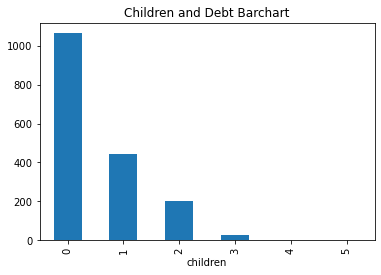

In [69]:
customers_df['debt'].groupby(customers_df['children']).sum().plot.bar(title = "Children and Debt Barchart")

<AxesSubplot:title={'center':'Correlation of debt to children'}, xlabel='debt', ylabel='children'>

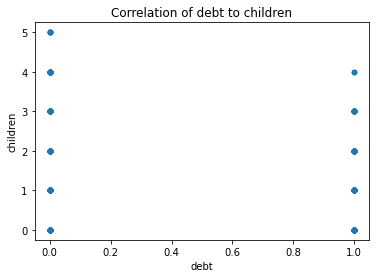

In [70]:
customers_df.plot.scatter(x = 'debt', y = 'children', colormap = 'viridis', title = 'Correlation of debt to children')

In [71]:
column_1 = customers_df['debt']
column_2 = customers_df['children']
column_1.corr(column_2)

0.024677489673126853

### 3.1 Conclusion
- According to my plots and correlation calculation, there is a weak positive correlation between these columns. Not enough evidence to support the notion that repaying loans on time and having children are related to one another.

- Is there a connection between marital status and repaying a loan on time?

<AxesSubplot:title={'center':'Family_status_id and Debt Barchart'}, xlabel='family_status_id'>

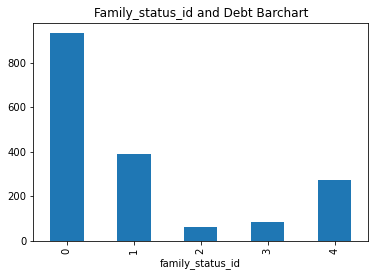

In [61]:
customers_df['debt'].groupby(customers_df['family_status_id']).sum().plot.bar(title = 'Family_status_id and Debt Barchart')

<AxesSubplot:title={'center':'Correlation of debt to family_status_id'}, xlabel='debt', ylabel='family_status_id'>

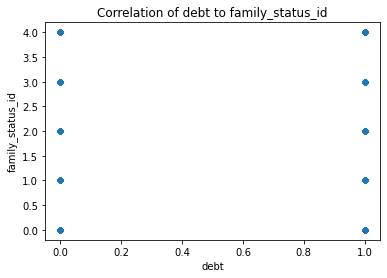

In [57]:
customers_df.plot.scatter(x = 'debt', y = 'family_status_id', colormap = 'viridis', title = 'Correlation of debt to family_status_id')

In [58]:
column_3 = customers_df['debt']
column_4 = customers_df['family_status_id']
column_3.corr(column_4)

0.0203469794897371

In [73]:
data_pivot_marital = customers_df.pivot_table(
    index='family_status', values='debt', aggfunc=['sum','count'])

data_pivot_marital['percent_default'] = (data_pivot_marital['sum']/data_pivot_marital['count'])*100
data_pivot_marital

,sum,count,percent_default
,debt,debt,
family_status,,,
civil partnership,388,4150,9.349398
divorced,85,1195,7.112971
married,931,12339,7.545182
unmarried,274,2810,9.750890
widow / widower,63,959,6.569343


Note: Based on the table above, no specific family_status type is more likely to default on a loan statistically speaking.

### 3.2 Conclusion
- According to my plots and correlation calculation, there is a weak positive correlation between these columns. Not enough evidence to support the notion that repaying loans on time and marital status are related to one another.

- However, due to my colleagues suggestion, it is important to highlight that a **unmarried (9.8%)** customer is more likely to default on a loan than any other customer type.

- Is there a connection between income level and repaying a loan on time?

<AxesSubplot:title={'center':'Correlation of debt to total_income_categorized'}, xlabel='debt', ylabel='total_income_categorized'>

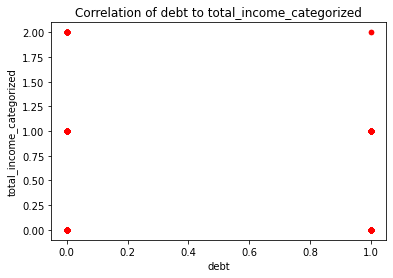

In [74]:
customers_df.plot(kind = 'scatter', x ='debt', y = 'total_income_categorized', color = 'red', title = 'Correlation of debt to total_income_categorized')

In [75]:
column_5 = customers_df['debt']
column_6 = customers_df['total_income_categorized']
column_5.corr(column_6)

-0.010649992146758823

### 3.3 Conclusion
- According to my plots and correlation calculation, there is a weak negative correlation between these columns. Not enough evidence to support the notion that repaying loans on time and income level are related to one another.

- How do different loan purposes affect on-time loan repayment?

<AxesSubplot:title={'center':'Purpose_categorized and Debt Barchart'}, xlabel='purpose_categorized'>

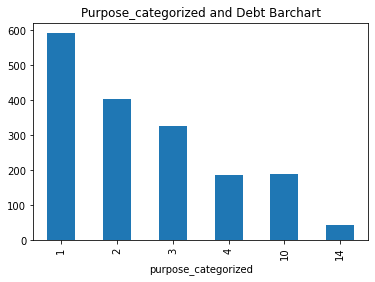

In [61]:
customers_df['debt'].groupby(customers_df['purpose_categorized']).sum().plot.bar(title = 'Purpose_categorized and Debt Barchart')

<AxesSubplot:title={'center':'Correlation of debt to purpose_categorized'}, xlabel='debt', ylabel='purpose_categorized'>

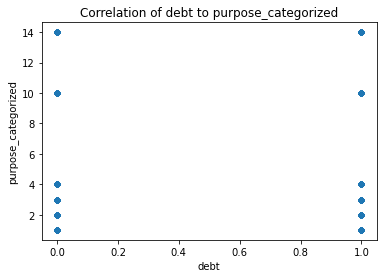

In [64]:
customers_df.plot.scatter(x = 'debt', y = 'purpose_categorized', colormap = 'viridis', title = 'Correlation of debt to purpose_categorized')

In [63]:
column_7 = customers_df['debt']
column_8 = customers_df['purpose_categorized']
column_7.corr(column_8)

0.0011063921996481933

In [78]:
data_pivot_purpose = customers_df.pivot_table(
    index='purpose', values='debt', aggfunc=['sum','count'])

data_pivot_purpose['percent_default'] = (data_pivot_purpose['sum']/data_pivot_purpose['count'])*100
data_pivot_purpose

,sum,count,percent_default
,debt,debt,
purpose,,,
car,403,4306,9.359034
education,327,3517,9.297697
house,592,8272,7.156673
property,190,2538,7.486210
university,43,496,8.669355
wedding,186,2324,8.003442


### 3.4 Conclusion
- As with the previous questions, there is basically a nonexistant relationship between these two columns. There is not enough evidence to support the notion that repaying loans on time and the purpose of the loan are related to one another.

- Based on the above table, the purpose with the highest debt are customers who use the money for purchasing cars at 9.36%

## 4 General conclusion

Based on my plot and correlation analyses, there is no evidence that a customer's marital status and number of children would cause them to default on a loan. There might be a correlation between other data and defaulting on a loan such as credit score. I would suggest to a client that we collect more data if we want a better representation on whether a customer is going default or not.